# ТЕСТ 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
milk = pd.read_csv('data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [4]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
milk.shape

(168, 1)

In [6]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
milk    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


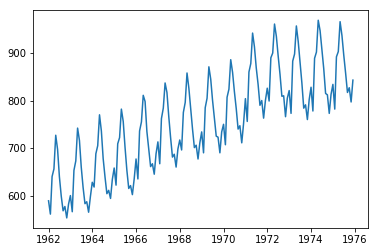

In [8]:
plt.plot(milk);

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера

In [11]:
import statsmodels.api as sm

In [10]:
round(sm.tsa.stattools.adfuller(milk['milk'])[1], 2)

0.63

In [12]:
%%timeit
milk['daily'] = [milk.loc[ind, 'milk'] / ind.days_in_month for ind in milk.index]

100 loops, best of 3: 7.29 ms per loop


варианты:

In [13]:
%%timeit
milk['daily'] = milk['milk'] / milk.index.days_in_month # лучший вариант, в 100 с лишним быстрее остальных

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 463 µs per loop


In [14]:
from calendar import monthrange

In [15]:
%%timeit
milk['daily'] = [float(milk.loc[ind, 'milk']) / monthrange(ind.year, ind.month)[1] for ind in milk.index]

100 loops, best of 3: 3.36 ms per loop


In [16]:
milk.index[0].year

1962

In [17]:
milk['daily'].head()

month
1962-01-01    19.000000
1962-02-01    20.035714
1962-03-01    20.645161
1962-04-01    21.866667
1962-05-01    23.451613
Name: daily, dtype: float64

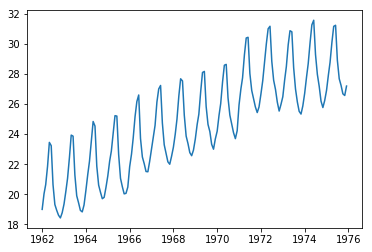

In [18]:
plt.plot(milk['daily']);

In [19]:
round(milk['daily'].sum(), 2)

4166.33

# ТЕСТ 2

In [20]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


# вопрос 7

С помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

In [21]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

In [22]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). 

In [23]:
milk.daily_diff12.head(15)

month
1962-01-01         NaN
1962-02-01         NaN
1962-03-01         NaN
1962-04-01         NaN
1962-05-01         NaN
1962-06-01         NaN
1962-07-01         NaN
1962-08-01         NaN
1962-09-01         NaN
1962-10-01         NaN
1962-11-01         NaN
1962-12-01         NaN
1963-01-01    0.354839
1963-02-01    0.178571
1963-03-01    0.419355
Name: daily, dtype: float64

Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

$H_0$: нестационарен   
$H_1$: стационарен

- **Дифференцирование не нужно, исходный ряд уже стационарен?**

In [25]:
print ('критерий Дики-Фуллера для исходного ряда: %f' % sm.tsa.stattools.adfuller(milk.daily)[1])
print ('ряд стационарен - ', sm.tsa.stattools.adfuller(milk.daily)[1] < 0.05)

критерий Дики-Фуллера для исходного ряда: 0.682215
ряд стационарен -  False


- **Ряд становится стационарным после однократного дифференцирования?**

In [26]:
print ('критерий Дики-Фуллера для диффиринцированного ряда: %f' % sm.tsa.stattools.adfuller(milk.daily_diff1[1:])[1])
print ('ряд стационарен - ', sm.tsa.stattools.adfuller(milk.daily_diff1[1:])[1] < 0.05)

критерий Дики-Фуллера для диффиринцированного ряда: 0.064301
ряд стационарен -  False


- **Ряд становится стационарным после сезонного дифференцирования?**

In [27]:
print ('критерий Дики-Фуллера для диффиринцированного ряда: %f' % sm.tsa.stattools.adfuller(milk.daily_diff12[12 * 1:])[1])
print ('ряд стационарен - ', sm.tsa.stattools.adfuller(milk.daily_diff12[12 * 1:])[1] < 0.05)

критерий Дики-Фуллера для диффиринцированного ряда: 0.221277
ряд стационарен -  False


- **Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного?**

In [31]:
milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(1)

print ('критерий Дики-Фуллера для диффиринцированного ряда: %f' % sm.tsa.stattools.adfuller(milk.daily_diff12_1[12*1 + 1*1:])[1])
print ('ряд стационарен -', (sm.tsa.stattools.adfuller(milk.daily_diff12_1[12*1 + 1*1:])[1] < 0.05))

критерий Дики-Фуллера для диффиринцированного ряда: 0.000002
ряд стационарен - True


In [33]:
 milk.daily_diff12_1[12*1 + 1*1:].head()

month
1963-02-01   -0.176267
1963-03-01    0.240783
1963-04-01    0.147312
1963-05-01   -0.082796
1963-06-01    0.149462
Name: daily, dtype: float64

## вопрос 8

Для стационарного ряда из предыдущего вопроса постройте график автокорреляционной функции.   
Это можно cделать так:

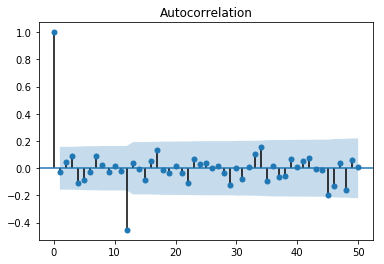

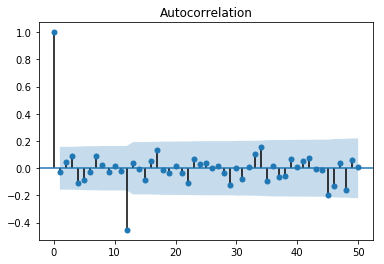

In [34]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff12_1[12*1 + 1*1:].values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?   

Ответ: 1


## вопрос 9

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.   
Это можно сделать так:

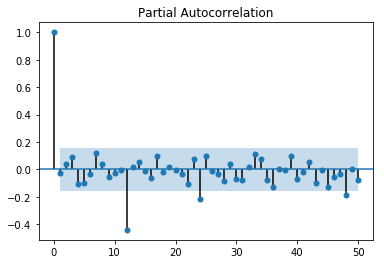

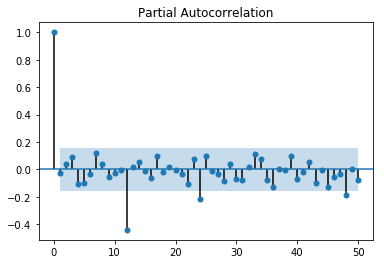

In [35]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1[12*1 + 1*1:].values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

Ответ: 0

In [38]:
# !pip install --upgrade pip 
# !pip install -U statsmodels==0.8.0rc1

In [39]:
import statsmodels
statsmodels.__version__

'0.8.0'